<a href="https://colab.research.google.com/github/seyyaw/summerschool/blob/main/NLP_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<style>
table {display: block;}
td {
  font-size: 18px
}
.rendered_html { font-size: 28px; }
*{ line-height: 200%; }
</style>

# Summer School for Women in AI and Data Sceince
---
---
# <span style="color:blue">Natural Language Processing - II</span>
 ---
## -  <span style="color:red">Seid Muhie Yimam  - UHH, HCDS</span>
## -  <span style="color:red">Hellina Hailu Negatu -  University of Berkeley</span>
---
---

# Content
1. Further text processing
1. NLP applications, ML, and Feature engineering
1. Text representation
   1. One hot embedding/bag of words
   1. TFIDF
   1. Word2vec
   1. Transformer, BERT and RoBERTa
1. Large Language Models
1. Resources and repositories

# Text preprocessing

Preprocessing involves cleaning the input data to reduce noise, ensuring that the resulting model is more accurate and effective. Otherwise, the principle of <span style="color:blue">garbage in, garbage out</span> applies.


Some preprocessing include:
- Removing extra white space
- Remove stop words
- Converting or restoring cases (upper case and lower case)
- Remove punctuations

In [ ]:
# Lowercasing
text = "I SAW THE MAN ON THE HILL WITH A TELESCOPE"
print ("Original message==>", text)
print ("lowered message==>", text.lower())

Original message==> I SAW THE MAN ON THE HILL WITH A TELESCOPE
lowered message==> i saw the man on the hill with a telescope


## Dealing with spaces

In [ ]:
# removing leading and trai
text  = "     I saw the man on the        hill with a telescope    "
print ("Original message==>", text)
print ("lowered message==>", text.strip())

Original message==>      I saw the man on the        hill with a telescope    
lowered message==> I saw the man on the        hill with a telescope


In [ ]:
# Removing all spaces
text  = "     I saw the man on the        hill with a telescope    "
print ("Original message==>", text)
print ("lowered message==>", text.replace(" ", ""))

Original message==>      I saw the man on the        hill with a telescope    
lowered message==> Isawthemanonthehillwithatelescope


In [ ]:
# Remove duplicate space
text  = "     I saw the man on the        hill with a telescope    "
print ("Original message==>", text)
print ("lowered message==>", ' '.join(text.split()))

Original message==>      I saw the man on the        hill with a telescope    
lowered message==> I saw the man on the hill with a telescope


In [ ]:
# Remove white space using Regex
import re

text  = "     I saw the man on the        hill with a telescope    "
print('Remove all spaces using regex ==>', re.sub(r"\s+", "", text), sep='')  # \s matches all white spaces
print('Remove leading spaces using regex ==>', re.sub(r"^\s+", "", text), sep='')  # ^ matches start
print('Remove trailing spaces using regex ==>', re.sub(r"\s+$", "", text), sep='')  # $ matches end
print('Remove leading and trailing spaces using regex ==>', re.sub(r"^\s+|\s+$", "", text), sep='')  # | for OR condition

Remove all spaces using regex ==>Isawthemanonthehillwithatelescope
Remove leading spaces using regex ==>I saw the man on the        hill with a telescope    
Remove trailing spaces using regex ==>     I saw the man on the        hill with a telescope
Remove leading and trailing spaces using regex ==>I saw the man on the        hill with a telescope


# Stopwords
Stop words are words ignored by search engines in search queries, typically including articles, prepositions, pronouns, and auxiliary verbs. The default English stop word list features words such as **a**,**the**, **and**, and **is**, among others.

In [ ]:
# Get stopwords from nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/yimam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords.words('german'))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

In [ ]:
#Try the following, there is no stopwords for Amahric in nltk
# print(stopwords.words('amharic'))

# spaCy stopwrds


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = "I saw the man on the hill with a telescope"
doc = nlp(text)
filtered_words = [token.text for token in doc if not token.is_stop]
clean_text = ' '.join(filtered_words)
print("Original Text:", text)
print("Text after Stopword Removal:", clean_text)

Original Text: I saw the man on the hill with a telescope
Text after Stopword Removal: saw man hill telescope


# Amharic stopwords
If you want to use the stopwords for Amharic, use the one from our semantic models github repositor

In [ ]:
!pip install wget

In [ ]:
import wget
am_stopwords = open(wget.download("https://raw.githubusercontent.com/uhh-lt/ethiopicmodels/master/am/normalization/amstopwords.txt")).read().split("\n")

100% [............................................................] 3423 / 3423

In [ ]:
am_stopwords

['Ethiopia',
 'is',
 'it',
 'me',
 'news',
 'the',
 'this',
 'to',
 'via',
 'you',
 'አሉ',
 'ሀገር ',
 'ሁሉ',
 'ሁሉም ',
 'ሁሉንም',
 'ሁል',
 'ሁኔታ',
 'ህዝብ ',
 'ሆነ',
 'ሆኑ',
 'ሆኖም',
 'ሆኖም',
 'ሆይ ',
 'ኋላ',
 'ለማለት',
 'ለምን',
 'ለዘላለም',
 'ለድርጊቶችዎ ',
 'ላይ',
 'ሌላ',
 'ሌሎች',
 'ልክ ',
 'ልጅ ',
 'መሆኑ',
 'መሆን ',
 'መልካም',
 'መቸ',
 'መቸም',
 'መንግስት ',
 'መካከል',
 'መግለጹን',
 'ማለት',
 'ማነው ',
 'ማን',
 'ማንም',
 'ማንኛውም',
 'ማድረግ',
 'ምነው',
 'ምን',
 'ምንም',
 'ምንድን',
 'ምክንያቱም',
 'ምክንያት',
 'ሰሞኑን',
 'ሰአት',
 'ሰው ',
 'ሰዎች ',
 'ሲሆን',
 'ሲሉ',
 'ሲል',
 'ሲናገር',
 'ሳይሆን',
 'ሴት ',
 'ስለ',
 'ስለሆነ',
 'ስም',
 'ስራ ',
 'ቀን',
 'ቁጥር ',
 'በኋላ',
 'በለው',
 'በላይ',
 'በል',
 'በሰላም ',
 'በሰሞኑ',
 'በርካታ',
 'በቃ ',
 'በተለይ',
 'በተመለከተ',
 'በተመሳሳይ',
 'በታች',
 'በአል',
 'በኢትዮጵያ ',
 'በኩል',
 'በውስጥ',
 'በዚህ',
 'በይ',
 'በጣም',
 'በፊት',
 'ቢሆን',
 'ቢቢሲ',
 'ቤተሰቦችዎ ',
 'ቤት ',
 'ብለህ',
 'ብለዋል',
 'ብላ',
 'ብሎ',
 'ብር ',
 'ብቸኛው',
 'ብቻ',
 'ብቻውን',
 'ብዙ',
 'ብዛት',
 'ቦታ',
 'ተማሪዎች ',
 'ተባለ',
 'ተናግረዋል',
 'ተከናውኗል',
 'ተው',
 'ተገለጸ',
 'ተገልጿል',
 'ተጠናቅቋል ',
 'ተጨማሪ',
 'ቲም',
 'ታላቅ ',
 'ታች',
 'ታዲያ',
 'ትልቅ',
 '

# <span style="color:red">Excercise</span>
1. What is the purpose of removing stopwords in natural language processing (NLP)?
2. Under what circumstances should stopwords be retained?

# Remove punctuations

In [ ]:
# Simple removal
import string
text = "I saw a man, he was on the hill!; and he is with a telescope!"
print("Original ==>", text)
print("Punctuation removed ==", text.translate(string.punctuation))

Original ==> I saw a man, he was on the hill!; and he is with a telescope!
Punctuation removed == I saw a man, he was on the hill!; and he is with a telescope!


---
---
Text classification

---
---

<span style="color:blue">Text classification</span> is a key task in supervised machine learning (ML), involving the categorization of documents into predefined tags. This process facilitates the automated and cost-effective structuring and analysis of text. As a fundamental component of Natural Language Processing (NLP), it has wide applications including sentiment analysis, spam detection, topic labeling, and intent detection.

## Text classification steps
1. Import Libraries
2. Load Dataset & Conduct Exploratory Data Analysis
3. Preprocess Text
4. Vectorize Text
5. Execute Machine Learning Algorithms

In this exercise, we use existing libraries for text classification. In general, it is customery to load all the libraries at the top of codes (notebooks)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import seaborn as sns
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /Users/yimam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yimam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/yimam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the dataset and explanatory analysis (EDA)

We will use the dataset from this Kaggle repository: [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started/data)

## What should I expect the data format to be?

Each sample in the train and test set has the following information:
   
- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

## What to predict?
You are predicting whether a given tweet is about a real disaster or not. If so, predict a **1**. If not, predict a **0**.

In [ ]:
# Get the data from here if you did not join Kaggle
https://github.com/bianchi-john/Natural-Language-Processing-with-Disaster-Tweets/tree/main#

wget.download("https://raw.githubusercontent.com/bianchi-john/Natural-Language-Processing-with-Disaster-Tweets/main/train.csv")
wget.download("https://raw.githubusercontent.com/bianchi-john/Natural-Language-Processing-with-Disaster-Tweets/main/test.csv")

100% [........................................................] 430580 / 430580

'test.csv'

## Load the datasets using pandas

In [ ]:
df_train= pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [ ]:
# Lets check the length of tarin and test sets
len(df_train), len(df_test)

(7613, 3263)

In [ ]:
df_train.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# Basic EDA -- more on the Data Sceince course

## Class distribution
Understanding the class distribution of the dataset, specifically the distribution of target labels, is crucial for building NLP applications. This knowledge reveals whether the data is balanced or imbalanced. If the dataset is imbalanced, finding a solution to address this issue becomes necessary.

<Axes: xlabel='target', ylabel='count'>

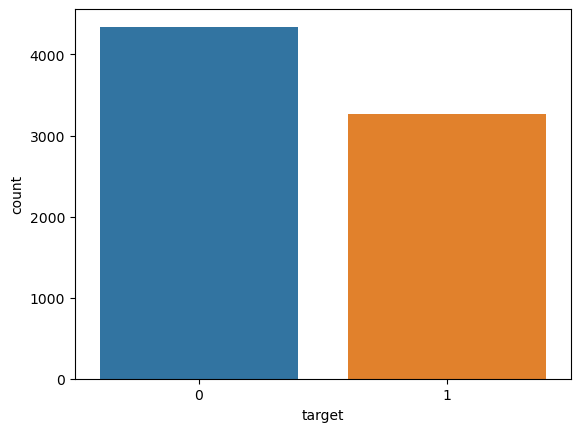

In [ ]:
sns.countplot(data=df_train, x='target', order=df_train.target.value_counts().index)

In [ ]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

## Count the number of words
Based on the domain, you like to have a feeling of the tweet length. It helps to plan the kind of model to build

In [ ]:
# add a word count column
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_train

,id,keyword,location,text,target,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19


In [ ]:
print("Disaster tweets ==>", df_train[df_train['target']==1]['word_count'].mean()) #Disaster tweets
print("Non-Disaster tweets ==>", df_train[df_train['target']==0]['word_count'].mean()) #Non-Disaster tweets

Disaster tweets ==> 15.167532864567411
Non-Disaster tweets ==> 14.704744357438969


## Plotting word count

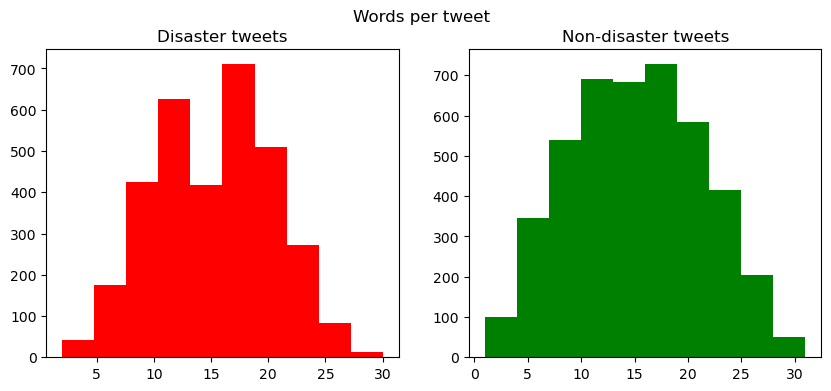

In [ ]:
# PLOTTING WORD-COUNT
# a single figure with 2 subplots, in one row and two column, each size 10 by 4
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_train[df_train['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')

train_words=df_train[df_train['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')

fig.suptitle('Words per tweet')
plt.show()

# Number of in a tweet

In [ ]:
# CHARACTER-COUNT
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
print("Disaster average character length==>", df_train[df_train['target']==1]['char_count'].mean())
print("Non-Disaster average character length ==>", df_train[df_train['target']==0]['char_count'].mean())

Disaster average character length==> 108.11342097217977
Non-Disaster average character length ==> 95.70681713496084


## Text cleaning
1. Remove punctuations, special characters, URLs, and hashtags.
2. Eliminate leading, trailing, and excessive white spaces or tabs.
3. Correct typos and slang, and expand abbreviations to their full forms.


In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower()
    text=text.strip()
    text=re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [ ]:
# STOPWORD REMOVAL
def stopword(string):
    words= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(words)

In [ ]:
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()

In [ ]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    words=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(words)

In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df_train['clean_text'] = df_train['text'].apply(lambda x: finalpreprocess(x))
df_train.head()

,id,keyword,location,text,target,word_count,char_count,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,get sent photo ruby alaska smoke wildfires pou...


# Extracting vectors from text (Vectorization)
Machine learning models require numerical data, so text is converted using methods like Vectorization or Word Embedding. Common techniques include **Bag-of-Words** (BoW) and **Word2Vec**.

## Sklearn for BoW
1. **Count vectors**: It builds a vocabulary from a corpus of documents and counts how many times the words appear in each document
1. **Term Frequency-Inverse Document Frequency (TF-IDF)** is an advanced variant of Bag-of-Words that provides a more nuanced conversion of text to numerical data than simple count vectors. In TF-IDF, a word's value increases with its frequency in a document but decreases with its frequency in the corpus.


## Word2Vec
It is a popular technique using shallow neural networks, overcomes the limitations of Bag-of-Words by capturing the context, semantic and syntactic similarities, and relationships between words in a document.

## partition the dataset

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df_train["clean_text"],df_train["target"],test_size=0.2,shuffle=True)

#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

# <span style="color:red">Exercise </span>
Why do we divide the training data into additional training and test sets when a test set is already provided by Kaggle?

## Bag-of-Words (with Tf-Idf ) and Word2Vec

In [ ]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

## create Word2vec model

In [ ]:

#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df_train['clean_text_tok']=[nltk.word_tokenize(i) for i in df_train['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_train['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))

In [ ]:
df_train

,id,keyword,location,text,target,word_count,char_count,clean_text,clean_text_tok
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,deed reason earthquake may allah forgive u,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,resident ask shelter place notify officer evac...,"[resident, ask, shelter, place, notify, office..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,people receive wildfire evacuation order calif...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,get sent photo ruby alaska smoke wildfires pou...,"[get, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11,83,two giant crane hold bridge collapse nearby ho...,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20,125,aria ahrary thetawniest control wild fire cali...,"[aria, ahrary, thetawniest, control, wild, fir..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,65,utc km volcano hawaii http co zdtoyd ebj,"[utc, km, volcano, hawaii, http, co, zdtoyd, ebj]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19,137,police investigate e bike collide car little p...,"[police, investigate, e, bike, collide, car, l..."


In [ ]:
# converting text to numerical data using Word2Vec
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_test_vectors_w2v = modelw.transform(X_test_tok)

In [ ]:
X_train_vectors_w2v

array([[-0.43459368,  0.41957116,  0.1349785 , ..., -0.666574  ,
         0.1116398 , -0.15157208],
       [-0.06221914,  0.05752639,  0.01792976, ..., -0.09099243,
         0.01582837, -0.02560844],
       [-0.4094105 ,  0.38628498,  0.1286214 , ..., -0.6203714 ,
         0.10419885, -0.14634758],
       ...,
       [-0.12512371,  0.11251997,  0.03814226, ..., -0.18855771,
         0.03583333, -0.04679265],
       [-0.13948311,  0.12405509,  0.04253467, ..., -0.20542847,
         0.04202238, -0.05018463],
       [-0.2772887 ,  0.2609621 ,  0.08535441, ..., -0.41915277,
         0.07309496, -0.09973972]], dtype=float32)

In [ ]:
X_train_vectors_w2v.shape, X_val_vectors_w2v.shape

((6090, 100), (1523, 100))

## Running ML algorithms
### Logistic Regression - tf-idf

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]


print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       860
           1       0.76      0.73      0.74       663

    accuracy                           0.78      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.78      0.78      0.78      1523

Confusion Matrix: [[708 152]
 [180 483]]
AUC: 0.8533217580413203


### Logistic Regression - w2vec

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_test_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_test_vectors_w2v)[:,1]


print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       860
           1       0.67      0.37      0.48       663

    accuracy                           0.65      1523
   macro avg       0.66      0.62      0.61      1523
weighted avg       0.65      0.65      0.62      1523

Confusion Matrix: [[738 122]
 [415 248]]
AUC: 0.7170297099161669


## Naive Bayes

In [ ]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]


print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       860
           1       0.85      0.64      0.73       663

    accuracy                           0.79      1523
   macro avg       0.81      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523

Confusion Matrix: [[783  77]
 [237 426]]
AUC: 0.8521256445333053


# Testing with the actual test set

In [ ]:
#Testing it on new dataset with the best model
df_test=pd.read_csv('test.csv')  #reading the data
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text']
X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
y_predict = lr_tfidf.predict(X_vector)      #use the trained model on X_vector
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['target']= y_predict
print(df_test.head())

   id keyword location                                               text  \
0   0     NaN      NaN                 Just happened a terrible car crash   
1   2     NaN      NaN  Heard about #earthquake is different cities, s...   
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...   
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

   target                                         clean_text  predict_prob  
0       1                          happen terrible car crash      0.908002  
1       1  heard earthquake different city stay safe ever...      0.960655  
2       1  forest fire spot pond geese flee across street...      0.900619  
3       1                  apocalypse light spokane wildfire      0.858208  
4       1                 typhoon soudelor kill china taiwan      0.996358  


In [ ]:
final=df_test[['id','target']].reset_index(drop=True)
final

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


# <span style ="color:red">Excerice</span>
Merge the validation and train test and retrain the model (logistic reg) and see if it helps imrpoving the final dataset

#  Resources
1. [Text classifiation](https://github.com/vijayaiitk/NLP-text-classification-model/tree/main)